In [175]:
%matplotlib inline
plt.rcParams['savefig.dpi'] = 125
plt.rcParams['figure.dpi'] = 125
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from sklearn.model_selection import train_test_split

def do_regression(data_x, data_y, degree, test_x, test_y):
    """
    This function perform linear least squares to find a polynomial that fits the data
    
    Arguments:
    data_x: numpy array (1D) that contains the training x data
    data_y: numpy array (1D) that contains the y data
    degree: degree of  the polynomial to fit (1 is for a line)
    test_x: numpy array (1D) that contains the testing x data
    test_y: numpy array (1D) that contains the testing y data
    
    returns: an array of paramters for the fit
    """
    X = np.empty([len(data_x), degree+1])
    Y = np.empty([len(data_y)])
    X_test = np.empty([len(test_x), degree+1])
    Y_test = np.empty([len(test_y)])
    
    # for each training data point
    for i,x in enumerate(data_x):
        for j in range(degree+1):
            X[i,j] = x**j
        Y[i] = data_y[i]
    
    # for each testing data point
    for i,x in enumerate(test_x):
        for j in range(degree+1):
            X_test[i,j] = x**j
        Y_test[i] = test_y[i]
    
    # construct X^T X
    XTX = X.transpose().dot(X)
    
    a = np.linalg.solve(XTX, X.transpose().dot(Y))
    
    fitting_error = (X.dot(a) - Y).dot(X.dot(a) - Y)
    testing_error = (X_test.dot(a)-Y_test).dot(X_test.dot(a)-Y_test)
    
    return a, fitting_error, testing_error

iteration 1
## the model is array([ 1.31880712, 19.04432667])
** fitting error 80090.749143 ** testing error 12761.636030
iteration 2
## the model is array([1.17851011e+00, 1.90453381e+01, 1.84352655e-02])
** fitting error 80087.674410 ** testing error 12875.067926
iteration 3
## the model is array([0.69949605, 4.55815354, 0.08024354, 1.01915273])
** fitting error 18961.131545 ** testing error 2423.782280
iteration 4
## the model is array([ 1.22515415,  4.52150839, -0.14003611,  1.02175701,  0.01063706])
** fitting error 18917.936732 ** testing error 2364.004758
iteration 5
## the model is array([ 1.23057831,  6.32419967, -0.17486166,  0.67588389,  0.01307481,
        0.01271192])
** fitting error 18524.096760 ** testing error 2519.638213
iteration 6
## the model is array([ 1.54398423e+00,  6.30747424e+00, -4.47161123e-01,  6.79093822e-01,
        4.64510031e-02,  1.25605325e-02, -9.93328162e-04])
** fitting error 18508.282956 ** testing error 2539.797070
iteration 7
## the model is ar

Text(0.5, 1.0, 'overlaid polynomial function')

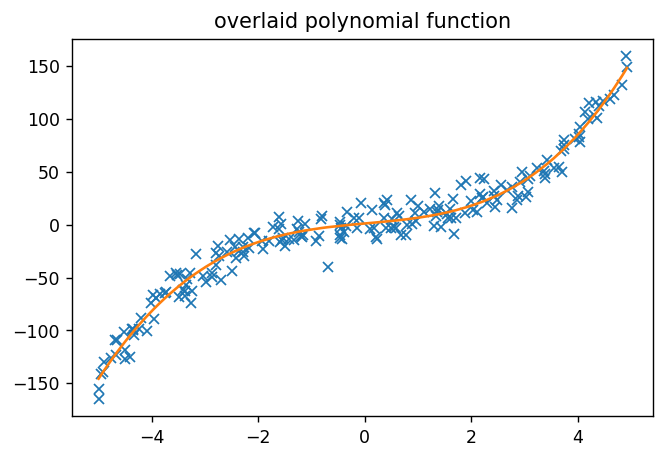

In [176]:
data = np.loadtxt("regression_dataset")
X = data[:,0]
Y = data[:,1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1) # load and split the dataset 

max_d = 10   
fitting_error = np.zeros(max_d)
testing_error = np.zeros(max_d)    # initialization

for i in range(max_d):
    print("iteration "+'%d'%(i+1) )
    model, fitting_error[i], testing_error[i]  = do_regression(x_train, y_train, i+1, x_test, y_test) 
    print("## the model is "+ '%r' %model)
    print("** fitting error "+ '%f' %fitting_error[i] + " ** testing error "+ '%f' %testing_error[i]  )
best_d = testing_error.argmin()+1
print("*****************")
print("best_d = "+'%i' %best_d) # use cross-validation to find the best polynomial degree 14 as shown below

model_best, error, predict_error = do_regression(x_train, y_train, best_d, x_test, y_test)
print("*****************")
print("the best model is " + '%r' %model_best + " selected through cross-validation") # get the best model

plot_x = np.sort(X)
plot_y = np.zeros(np.size(Y))

iniv = np.zeros([len(X), best_d+1])
#print(iniv.shape)
for i,x in enumerate(plot_x):
    for j in range(best_d+1):
        iniv[i,j] = x**j
plot_y = iniv.dot(model_best)
plt.plot(X, Y, 'x')
plt.plot(plot_x, plot_y)
plt.title("overlaid polynomial function")

In [170]:
import math

def do_regression_2(data_x, data_y, k, t, test_x, test_y):
    """
    This function perform triangular functional least squares to find a set of coefficients that fits the data
    
    Arguments:
    data_x: numpy array (1D) that contains the training x data
    data_y: numpy array (1D) that contains the y data
    k: periodic function degree 
    test_x: numpy array (1D) that contains the testing x data
    test_y: numpy array (1D) that contains the testing y data
    
    returns: an array of paramters for the fit
    """
    PI = math.pi
    T = t
    X = np.empty([len(data_x), 2*k+1])
    Y = np.empty([len(data_y)])
    X_test = np.empty([len(test_x), 2*k+1])
    Y_test = np.empty([len(test_y)])
    
    # for each training data point
    for i,x in enumerate(data_x):
        for j in range(k+1):
            X[i,j] = math.cos(j*T*2*PI*x)
        for j in range(k):
            X[i,j+k+1] = math.sin((j+1)*T*2*PI*x)
        Y[i] = data_y[i]

    # for each testing data point
    for i,x in enumerate(test_x):
        for j in range(k+1):
            X_test[i,j] = math.cos(j*T*2*PI*x)
        for j in range(k):
            X_test[i,j+k+1] = math.sin((j+1)*T*2*PI*x)
        Y_test[i] = test_y[i]
    
    # construct X^T X
    XTX = X.transpose().dot(X)
    
    a = np.linalg.solve(XTX, X.transpose().dot(Y))
    
    fitting_error = (X.dot(a) - Y).dot(X.dot(a) - Y)
    testing_error = (X_test.dot(a)-Y_test).dot(X_test.dot(a)-Y_test)
    
    return a, fitting_error, testing_error



iteration 1
## the model is array([ 1.97253699,  1.92582147, -0.01222802])
** fitting error 164.801043 ** testing error 73.044848
iteration 2
## the model is array([ 2.00000000e+00,  2.00000000e+00,  1.35207180e-16, -1.77216311e-16,
        1.50000000e+00])
** fitting error 0.000000 ** testing error 0.000000
iteration 3
## the model is array([ 2.00000000e+00,  2.00000000e+00,  1.09708947e-16,  4.04438030e-17,
       -1.60390644e-16,  1.50000000e+00,  2.14314281e-16])
** fitting error 0.000000 ** testing error 0.000000
iteration 4
## the model is array([ 2.00000000e+00,  2.00000000e+00,  3.10485408e-17,  1.64076633e-16,
       -2.15906830e-16, -1.41269215e-16,  1.50000000e+00,  3.44434019e-17,
       -1.47298646e-16])
** fitting error 0.000000 ** testing error 0.000000
iteration 5
## the model is array([ 2.00000000e+00,  2.00000000e+00,  3.07448698e-17,  1.75087526e-16,
       -2.22207407e-16,  2.20970940e-18, -1.25037990e-16,  1.50000000e+00,
        1.18151111e-17, -8.92544975e-17,  9

Text(0.5, 1.0, 'overlaid trigonometric function')

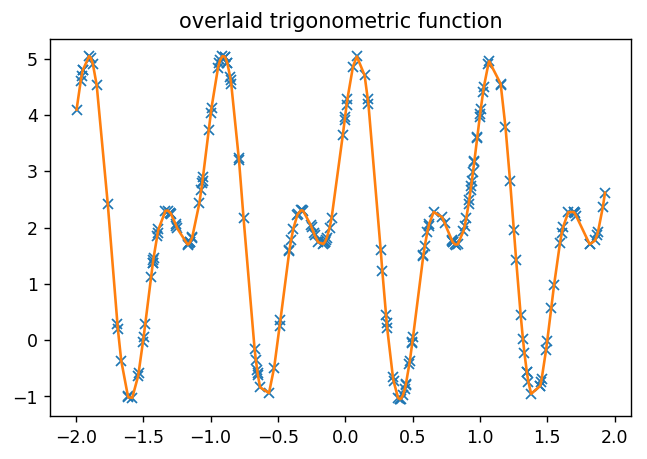

In [173]:
data2 = np.loadtxt("regression_dataset2")
X2 = data2[:,0]
Y2 = data2[:,1]
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, Y2, test_size = 0.3) # load and split the dataset 

max_k = 5
T = 1
fitting_error_2 = np.zeros(max_k)
testing_error_2 = np.zeros(max_k)    # initialization

for i in range(max_k):
    print("iteration "+'%d'%(i+1) )
    model, fitting_error_2[i], testing_error_2[i]  = do_regression_2(x2_train, y2_train, i+1, T, x2_test, y2_test) 
    print("## the model is "+ '%r' %model)
    print("** fitting error "+ '%f' %fitting_error_2[i] + " ** testing error "+ '%f' %testing_error_2[i])
    
best_k = testing_error_2.argmin()+1
print("*****************")
print("best_k = "+'%i' %best_k)

model_best_2, error_2, predict_error_2 = do_regression_2(x2_train, y2_train, best_k, T, x2_test, y2_test)
print("*****************")
print("the best model is " + '%r' %model_best_2 + " selected through cross-validation") 

plot_x_2 = np.sort(X2)
plot_y_2 = np.zeros(np.size(Y2))

iniv_2 = np.zeros([len(X2), 2*best_k+1])
for i,x in enumerate(plot_x_2):
    for j in range(best_k+1):
        iniv_2[i,j] = math.cos(j*T*2*math.pi*x)
    for j in range(best_k):
        iniv_2[i,j+best_k+1] = math.sin((j+1)*T*2*math.pi*x)
plot_y_2 = iniv_2.dot(model_best_2)
plt.plot(X2, Y2, 'x')
plt.plot(plot_x_2, plot_y_2)
plt.title("overlaid trigonometric function")

In [ ]:
# comment: in this case we do not worry about overfitting so we can simply do without cross-validation